In [1]:
from pyincore import InsecureIncoreClient, DataService, InventoryDataset
from pyincore import HazardService
from pyincore import PlotUtil
import json

In [2]:
client = InsecureIncoreClient("http://incore2-services.ncsa.illinois.edu:8888", "jonglee")

# Using Data Service
- With JupyterLab extention
- With pyincore api

In [3]:
datasvc = DataService(client)

In [4]:
datasvc.get_datasets(title="essential")

[{'id': '5a284f42c7d30d13bc0821ba',
  'deleted': False,
  'title': 'Shelby County Essential Facilities',
  'description': '',
  'date': '2017-12-06T14:12:50-0600',
  'creator': 'ergo',
  'contributors': [],
  'fileDescriptors': [{'id': '5a284f42c7d30d13bc0821bd',
    'deleted': False,
    'filename': 'shelby_county_ef.dbf',
    'mimeType': 'application/octet-stream',
    'size': 49029,
    'dataURL': 'file:/home/incore/data/5a/28/5a284f42c7d30d13bc0821bd/shelby_county_ef.dbf',
    'md5sum': 'a6a319c9e37ca66543202ee340b4d84d'},
   {'id': '5a284f42c7d30d13bc0821c0',
    'deleted': False,
    'filename': 'shelby_county_ef.fix',
    'mimeType': 'application/octet-stream',
    'size': 1897,
    'dataURL': 'file:/home/incore/data/5a/28/5a284f42c7d30d13bc0821c0/shelby_county_ef.fix',
    'md5sum': 'ece074b7ed9710f89434c6db1bc1fc6c'},
   {'id': '5a284f43c7d30d13bc0821c3',
    'deleted': False,
    'filename': 'shelby_county_ef.prj',
    'mimeType': 'application/octet-stream',
    'size': 220,


## Sample dataset: 5ade51daec2309045650c157 (Shelby county essencial facility)

In [5]:
dataset_id = "5ade51daec2309045650c157"
ess=datasvc.get_dataset_blob(dataset_id)

It already exsists; no unzip


In [6]:
buildings = InventoryDataset(ess)

In [7]:
import geopandas as gpd
gdf = gpd.GeoDataFrame.from_features(buildings.inventory_set)

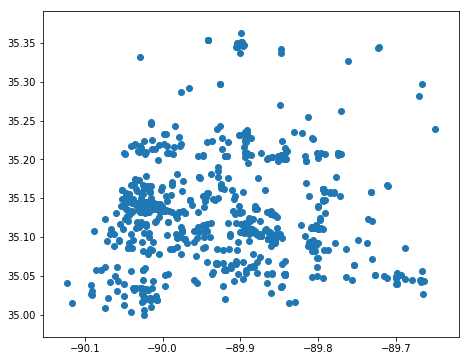

In [8]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6
gdf.plot()

In [9]:
gdf.head()

,IMPUTED,a_stories,appr_bldg,b_stories,bldg_id,broad_occ,bsmt_type,cont_val,dgn_lvl,dwell_unit,...,parid,parid_card,repl_cst,sq_foot,str_cst,str_prob,str_typ2,struct_typ,tract_id,year_built
0,F,1,1015500,0,088012 00133C_1_1,Office Commercial,NONE,3492254,Moderate - Code,0,...,088012 00133C,088012 00133C_1,2328169,19592,395789,1.00000,S1L,S1,47157020621,1997
1,T,2,3375000,0,071025 00085_SCH534,Education,NONE,8860365,Low - Code,0,...,071025 00085,071025 00085_SCH534,8860365,75000,2197371,0.46050,C1L,C1,47157010000,1965
2,F,2,171300,0,017022 00015_1_1,Office Commercial,NONE,1008905,Low - Code,1,...,017022 00015,017022 00015_1,672604,4388,98200,0.35000,W1,W1,47157003600,1900
3,T,2,3375000,0,044042 00008C_SCH576,Education,NONE,8860365,Low - Code,0,...,044042 00008C,044042 00008C_SCH576,8860365,75000,2197371,0.46050,C1L,C1,47157003000,1965
4,T,1,804000,2,075150 00025_1_1,Education,SLAB,2435338,Low - Code,0,...,075150 00025,075150 00025_1,2435338,20100,603964,0.41281,C1L,C1,47157022330,1965


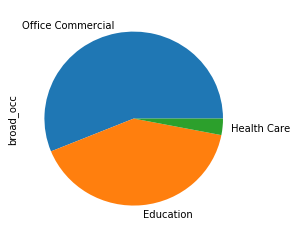

In [10]:
a = gdf['broad_occ'].value_counts()
a.plot.pie(figsize=(4,4))

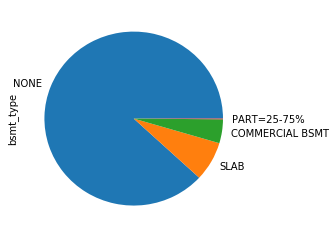

In [11]:
a = gdf['bsmt_type'].value_counts()
a.plot.pie(figsize=(4,4))

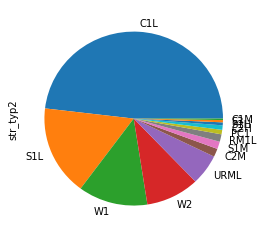

In [12]:
a = gdf['str_typ2'].value_counts()
a.plot.pie(figsize=(4,4))

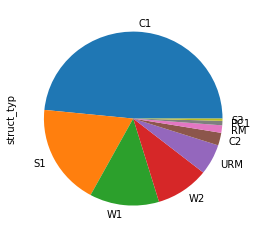

In [13]:
a = gdf['struct_typ'].value_counts()
a.plot.pie(figsize=(4,4))

In [15]:
PlotUtil.get_geopandas_map(gdf)

In [16]:
layers = [{'id': dataset_id,'name': 'Essential Facilities', 'style':''}]
PlotUtil.get_wms_map(layers)

In [17]:
hazardsvc = HazardService(client)

In [14]:
eq_config = {
  "attenuations": {
    "AtkinsonBoore1995": "1.0"
  },
  "eqParameters": {
    "srcLatitude": "35.927",
    "srcLongitude": "-89.919",
    "magnitude": "7.9",
    "depth": "10.0"
  },
  "visualizationParameters": {
    "demandType": "PGA",
    "demandUnits": "g",
    "minX": "-90.3099",
    "minY": "34.9942",
    "maxX": "-89.6231",
    "maxY": "35.4129",
    "numPoints": "1025",
    "amplifyHazard": "true"
  }
}
eq = hazardsvc.create_earthquake(json.dumps(eq_config))

In [18]:
# this is code to avoid create new earthquake over and over
eq = {'id': '5adf87dcec230904566c5dd7',
 'attenuations': {'AtkinsonBoore1995': 1.0},
 'eqParameters': {'srcLatitude': 35.927,
  'srcLongitude': -89.919,
  'magnitude': 7.9,
  'coseismicRuptureDepth': 0.0,
  'dipAngle': 0.0,
  'azimuthAngle': 0.0,
  'rakeAngle': 0.0,
  'seismogenicDepth': 0.0,
  'depth': 10.0,
  'depth2p5KmPerSecShearWaveVelocity': 2.0,
  'shearWaveDepth1p0': 0.0,
  'faultTypeMap': {},
  'region': 'Global'},
 'visualizationParameters': {'demandType': 'PGA',
  'demandUnits': 'g',
  'minX': -90.3099,
  'minY': 34.9942,
  'maxX': -89.6231,
  'maxY': 35.4129,
  'numPoints': 1025,
  'amplifyHazard': True},
 'siteClassDataset': None,
 'privileges': {'userPrivileges': {'jonglee': 'ADMIN'}, 'groupPrivileges': {}},
 'defaultSiteClass': 'D',
 'siteAmplification': 'NEHRP',
 'rasterDatasetId': '5adf87dcec23090456550ed5'}

In [22]:
layers = [
    {'id': eq['rasterDatasetId'],'name': 'earthquake', 'style':'earthquake-pga-g'},
    {'id': dataset_id,'name': 'Essential Facilities', 'style':''}
]
PlotUtil.get_wms_map(layers)

In [7]:
damage_ratio_id = "5a284f2ec7d30d13bc08209a"
dmg_ratio = datasvc.get_dataset_blob(damage_ratio_id)

It already exsists; no unzip


In [8]:
# need to have pandas data model
dmg_ratio

'data\\Building_Damage_Ratios_v1.1'

In [9]:
from pyincore.analyses.buildingdamage import BuildingDamage

In [10]:
mapping_id = "5aa9858d949f232724db46bd"
bldgDmg = BuildingDamage(client, "earthquake/"+eq['id'], dmg_ratio)

NameError: name 'eq' is not defined

In [29]:
import time
start = time.time()
output = bldgDmg.get_damage(buildings.inventory_set, mapping_id, 2, None, 2)
end = time.time()
print(str(end - start)+ " sec")

11.217262744903564 sec


In [30]:
start = time.time()
output = bldgDmg.get_damage(buildings.inventory_set, mapping_id, 2, None, 4)
end = time.time()
print(str(end - start)+ " sec")

10.158231019973755 sec


In [47]:
#pandas analysis
output

'dmg-results.csv'

In [22]:
tornado_config = {
    "tornadoModel" : "MeanWidthTornado",
    "tornadoParameters" : { 
        "efRating" : "EF5",
        "startLatitude" : "35.092",
        "startLongitude" : "-90.091",
        "randomSeed" : "1234",
        "endLatitude" : [35.268],
        "endLongitude" : [-89.758],
        "windSpeedMethod" : "1" 
    }
}

In [23]:
import json
tornado=hazardsvc.create_tornado_scenario(json.dumps(tornado_config))

In [11]:
tornado= {'id': '5adf88beec230904566c5dd8',
 'tornadoModel': 'MeanWidthTornado',
 'numSimulations': 1,
 'tornadoParameters': {'efRating': 'EF5',
  'maxWindSpeed': 250.0,
  'startLatitude': 35.092,
  'startLongitude': -90.091,
  'randomSeed': 1234,
  'windSpeedMethod': 1,
  'endLatitude': [35.268],
  'endLongitude': [-89.758]},
 'tornadoWidth': [815.9980909090909],
 'efBoxes': [{'efBoxWidths': [0.001002256638187928,
    0.0017328393158413994,
    0.0022321320000668874,
    0.0027387672237662794,
    0.003205018480359198,
    0.003671269736952117]}],
 'tornadoDatasetId': '5adf88beec23090456551d3b',
 'privileges': {'userPrivileges': {'jonglee': 'ADMIN'}, 'groupPrivileges': {}}}

In [12]:
layers = [
    {'id': tornado['tornadoDatasetId'],'name': 'tornado', 'style':'tornado'},
    {'id': dataset_id,'name': 'Essential Facilities', 'style':''}
]
PlotUtil.get_wms_map(layers)

In [13]:
print(tornado['id'])
tornado_mapping_id = "5ae0e51fff771b3240b6cce6"
bldgDmg_tornado = BuildingDamage(client, "tornado/"+tornado['id'], dmg_ratio)

5adf88beec230904566c5dd8


In [35]:
bldgDmg_tornado.get_damage(buildings.inventory_set, tornado_mapping_id, 0, None, 2)

KeyError: '0'

In [15]:
from pyincore import FragilityService
fragilitysvc = FragilityService(client)
fragilitysvc.map_fragilities(tornado_mapping_id, [buildings.inventory_set[0]], "Non-Retrofit Fragility ID Code")

b'{"params": {"key": "Non-Retrofit Fragility ID Code"}, "subject": {"inventory": {"features": [{"geometry": {"coordinates": [-89.89352834234703, 35.20327006574139], "type": "Point"}, "id": "0", "properties": {"IMPUTED": "F", "a_stories": 1, "appr_bldg": 1015500, "b_stories": 0, "bldg_id": "088012  00133C_1_1", "broad_occ": "Office Commercial", "bsmt_type": "NONE", "cont_val": 3492254, "dgn_lvl": "Moderate - Code", "dwell_unit": 0, "efacility": "EFMC", "gsq_foot": 19592, "guid": "a75b3bf9-db24-4494-959b-610b24d80444", "major_occ": "OFFICE MEDICAL", "no_stories": 1, "nstra_cst": 942909, "nstrd_cst": 989472, "occ_detail": "OFFICE MEDICAL", "occ_typ2": "COM7", "occ_type": "COM7", "parid": "088012  00133C", "parid_card": "088012  00133C_1", "repl_cst": 2328169, "sq_foot": 19592, "str_cst": 395789, "str_prob": 1.0, "str_typ2": "S1L", "struct_typ": "S1", "tract_id": "47157020621", "year_built": 1997, "__dict__": {}}, "type": "Feature"}], "type": "FeatureCollection"}, "schema": "building"}}'


{}

In [39]:
len(buildings.inventory_set)

723

In [42]:
fragilitysvc.map_fragilities(mapping_id, [buildings.inventory_set[0]], "Non-Retrofit Fragility ID Code")

{'0': {'id': '5aa9858a949f232724db2d4c',
  'legacyId': 'STR_PFM_MTB_UL_475_S1_4',
  'description': 'Low-Rise Steel Moment Frame',
  'authors': ['Amr S. Elnashai', 'Seong-Hoon Jeong', 'Joshua S. Steelman'],
  'paperReference': None,
  'resultUnit': None,
  'resultType': 'Limit State',
  'demandType': 'PGA',
  'demandUnits': 'g',
  'hazardType': 'earthquake',
  'inventoryType': 'building',
  'fragilityCurves': [{'className': 'edu.illinois.ncsa.incore.service.fragility.models.PeriodStandardFragilityCurve',
    'description': 'Moderate',
    'median': -1.485,
    'beta': 0.441,
    'curveType': 'LogNormal',
    'periodParam2': 0.0,
    'periodParam1': 0.0,
    'periodParam0': 0.5,
    'periodEqnType': 1},
   {'className': 'edu.illinois.ncsa.incore.service.fragility.models.PeriodStandardFragilityCurve',
    'description': 'Extensive',
    'median': -0.962,
    'beta': 0.441,
    'curveType': 'LogNormal',
    'periodParam2': 0.0,
    'periodParam1': 0.0,
    'periodParam0': 0.5,
    'periodE